In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import pickle

In [17]:

df = pd.read_csv('cleaned_weather_data_dhaka.csv')
df['time'] = pd.to_datetime(df['time'])
df.index = df['time']
df.head()

,time,temperature
time,,
2023-07-24 00:00:00,2023-07-24 00:00:00,29.6
2023-07-24 01:00:00,2023-07-24 01:00:00,29.1
2023-07-24 02:00:00,2023-07-24 02:00:00,28.7
2023-07-24 03:00:00,2023-07-24 03:00:00,28.4
2023-07-24 04:00:00,2023-07-24 04:00:00,28.1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2376 entries, 2023-07-24 00:00:00 to 2023-10-30 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         2376 non-null   datetime64[ns]
 1   temperature  2376 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.7 KB


In [19]:
df.head()

,time,temperature
time,,
2023-07-24 00:00:00,2023-07-24 00:00:00,29.6
2023-07-24 01:00:00,2023-07-24 01:00:00,29.1
2023-07-24 02:00:00,2023-07-24 02:00:00,28.7
2023-07-24 03:00:00,2023-07-24 03:00:00,28.4
2023-07-24 04:00:00,2023-07-24 04:00:00,28.1


In [20]:
#saving the dataset
df.to_csv('neuralprophet_data.csv', index= False)

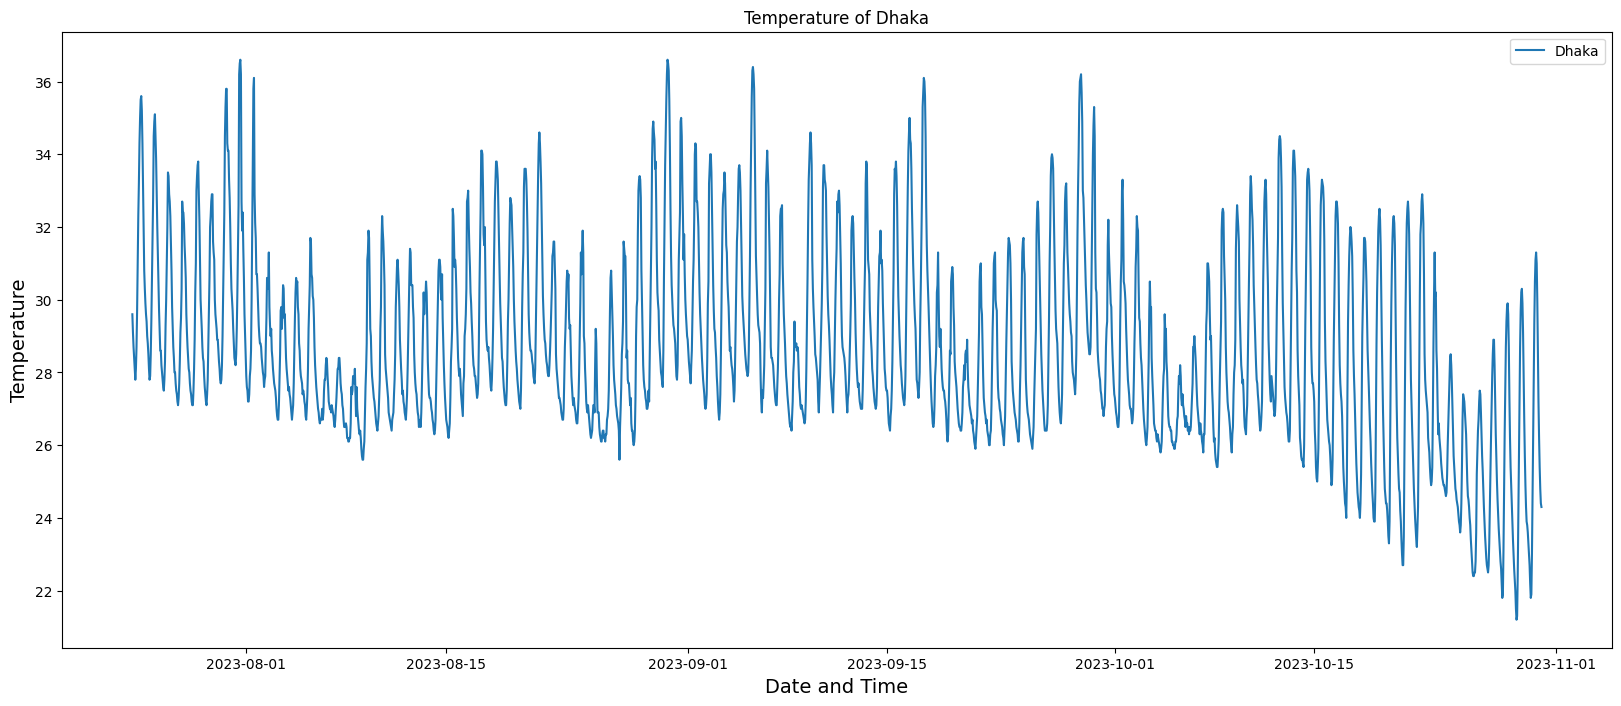

In [21]:
plt.figure(figsize=(20,8))
plt.title('Temperature of Dhaka')

plt.plot(df['temperature'])
    
plt.xlabel('Date and Time',fontsize = 14)
plt.ylabel('Temperature',fontsize = 14)

plt.legend(['Dhaka'])

<Axes: xlabel='time'>

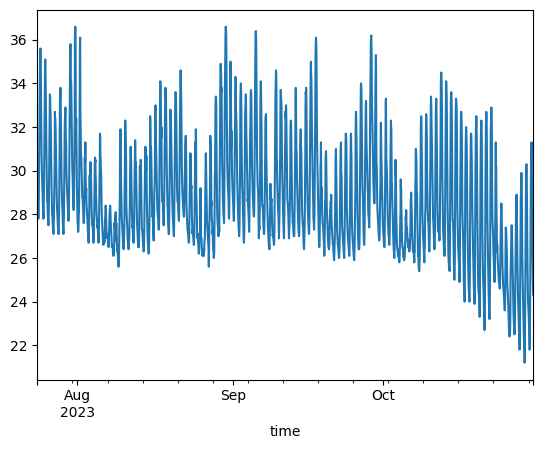

In [22]:
df['temperature'].plot()

In [23]:
df.rename(columns={'time':'ds', 'temperature':'y'}, inplace=True)
df.head()

,ds,y
time,,
2023-07-24 00:00:00,2023-07-24 00:00:00,29.6
2023-07-24 01:00:00,2023-07-24 01:00:00,29.1
2023-07-24 02:00:00,2023-07-24 02:00:00,28.7
2023-07-24 03:00:00,2023-07-24 03:00:00,28.4
2023-07-24 04:00:00,2023-07-24 04:00:00,28.1


In [24]:
m = NeuralProphet()

In [25]:
#train the model
m.fit(df,freq='H',epochs=1000)

#load saved model
# with open('dhaka_forecast.pkl','rb') as f:
#     m = pickle.load(f)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.958% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (75) is too small than the required number for the learning rate finder (234). The results might not be optimal.
Finding best initial lr: 100%|██████████| 234/234 [00:01<00:00, 175.00it/s]


Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 2305.54it/s, loss=0.00444, v_num=1, MAE=0.982, RMSE=1.270, Loss=0.0042, RegLoss=0.000]   


,MAE,RMSE,Loss,RegLoss,epoch
0,13.077435,16.050957,0.513747,0.0,0
1,12.572818,15.434131,0.483810,0.0,1
2,11.981506,14.734299,0.449841,0.0,2
3,11.413963,14.033945,0.416804,0.0,3
4,10.901357,13.419971,0.386807,0.0,4
...,...,...,...,...,...
995,0.974531,1.259616,0.004121,0.0,995
996,0.974325,1.259675,0.004128,0.0,996
997,0.977001,1.264964,0.004155,0.0,997
998,0.977676,1.265915,0.004142,0.0,998


In [26]:
df

,ds,y
time,,
2023-07-24 00:00:00,2023-07-24 00:00:00,29.6
2023-07-24 01:00:00,2023-07-24 01:00:00,29.1
2023-07-24 02:00:00,2023-07-24 02:00:00,28.7
2023-07-24 03:00:00,2023-07-24 03:00:00,28.4
2023-07-24 04:00:00,2023-07-24 04:00:00,28.1
...,...,...
2023-10-30 19:00:00,2023-10-30 19:00:00,26.2
2023-10-30 20:00:00,2023-10-30 20:00:00,25.4
2023-10-30 21:00:00,2023-10-30 21:00:00,24.8


In [33]:
future = m.make_future_dataframe(df, periods=240)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.958% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.583% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 222.00it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2023-10-31 00:00:00,None,24.403826,25.779377,0.177775,-1.553327
1,2023-10-31 01:00:00,None,24.177294,25.774527,0.174692,-1.771925
2,2023-10-31 02:00:00,None,23.905241,25.769676,0.170986,-2.035421
3,2023-10-31 03:00:00,None,23.679825,25.764826,0.166605,-2.251605
4,2023-10-31 04:00:00,None,23.510490,25.759975,0.161504,-2.410989


<Axes: xlabel='ds'>

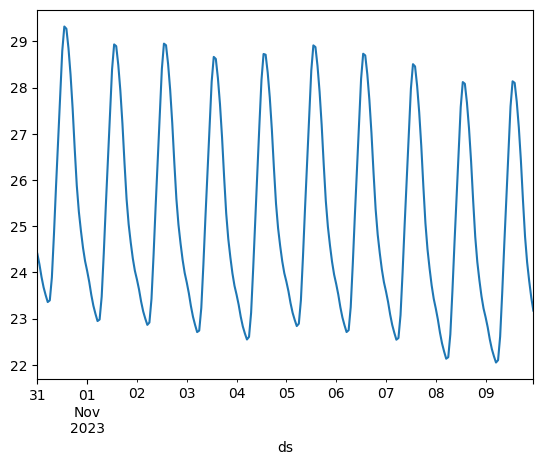

In [34]:
forecast.index = forecast['ds']
forecast['yhat1'].plot()

In [35]:
forecast.shape

(240, 6)

In [30]:
#save the model
with open('dhaka_forecast.pkl','wb') as f:
    pickle.dump(m,f)